In [169]:
import numpy as np
import pandas as pd 
import pickle
from pathlib import Path
import polars as pl
from tqdm import tqdm

In [170]:
dtypes = {'buildingblock1_smiles': np.int16, 'buildingblock2_smiles': np.int16, 'buildingblock3_smiles': np.int16,
          'binds_BRD4':np.byte, 'binds_HSA':np.byte, 'binds_sEH':np.byte}

directory = Path("../../data/shrunken/")

In [171]:
train_data =  pl.read_parquet(directory / "train.parquet")
train_data = train_data.to_pandas(use_pyarrow_extension_array=True)

## Retrieve 10M most different molecules and save

In [103]:
plot_data = train_data

In [89]:
SEH_bb1_5000 = [68, 75, 76]
plot_data = plot_data[~plot_data.buildingblock1_smiles.isin(SEH_bb1_5000)]

In [94]:
SEH_bb2_5000 = [26, 36, 71, 123, 318, 325, 493, 576, 632]
plot_data = plot_data[~plot_data.buildingblock2_smiles.isin(SEH_bb2_5000)]

In [98]:
SEH_bb3_5000 = [155, 230, 298, 401, 430, 432]
plot_data = plot_data[~plot_data.buildingblock3_smiles.isin(SEH_bb3_5000)]

Text(0.5, 1.0, 'Distribution of buildingblock1_smiles where binds_sEH is 1')

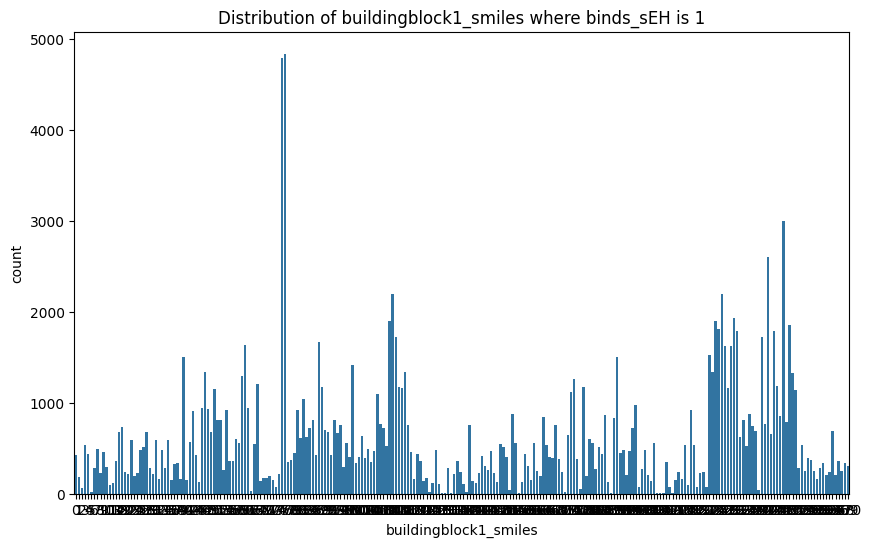

In [188]:
# Plot distribution of binding classes and building block smiles
import matplotlib.pyplot as plt
import seaborn as sns

# Print counts of buildingblock1_smiles where binds_sEH is 1
# plot_data = train_data
BUILDINGBLOCK = 'buildingblock1_smiles'
# print(plot_data[plot_data['binds_sEH'] == 1][BUILDINGBLOCK].value_counts())
# Count buildingblock1_smiles value counts
# print(train_data[train_data['binds_sEH'] == 1][BUILDINGBLOCK].value_counts())

# Plot distribution of buildingblock1_smiles where binds_sEH is 1
plt.figure(figsize=(10, 6))
sns.countplot(x=BUILDINGBLOCK, data=train_data[train_data['binds_sEH'] == 1])
plt.title(f'Distribution of {BUILDINGBLOCK} where binds_sEH is 1')


In [174]:
old_data = train_data

In [175]:
# 
proteins = ['binds_BRD4', 'binds_HSA', 'binds_sEH']
BUILDINGBLOCK1 = 'buildingblock1_smiles'
BUILDINGBLOCK2 = 'buildingblock2_smiles'
BUILDINGBLOCK3 = 'buildingblock3_smiles'
building_blocks = [BUILDINGBLOCK1, BUILDINGBLOCK2, BUILDINGBLOCK3]
binds = [0,0,1]
# Filter data such that it only has maximum of 5000 bindings per building block smiles where binds_sEH is 1
# This means if the value count of a building block smiles is greater than 5000, we remove the excess
for building_block in building_blocks:
    binding = (train_data['binds_BRD4'] == binds[0]) & (train_data['binds_HSA'] == binds[1]) & (train_data['binds_sEH'] == binds[2])
    value_counts = train_data[binding].value_counts(building_block)
    value_counts = value_counts[value_counts > 5000]
    value_counts = value_counts.index.tolist()
    print(value_counts)
    # Take 5000 random samples from the train data where the building block smiles is in value_counts
    # Create a new dataframe with the samples
    data = pd.DataFrame()
    for value in value_counts:
        temp = train_data[(train_data[building_block] == value) & binding]
        temp = temp.sample(n=5000, random_state=1)
        data = pd.concat([data, temp])
    # Remove the value_counts from the train data
    train_data = train_data[~train_data[building_block].isin(value_counts)]
    # Concatenate the new dataframe with the train data
    train_data = pd.concat([train_data, data])

train_data[(train_data['binds_sEH'] == 1)].shape[0]


[75, 76]
[493, 26, 325, 318, 71, 36]
[298, 432, 430]


206454

In [176]:
binds = [0,1,0]
# Filter data such that it only has maximum of 5000 bindings per building block smiles where binds_sEH is 1
# This means if the value count of a building block smiles is greater than 5000, we remove the excess
for building_block in building_blocks:
    binding = (train_data['binds_BRD4'] == binds[0]) & (train_data['binds_HSA'] == binds[1]) & (train_data['binds_sEH'] == binds[2])
    value_counts = train_data[binding].value_counts(building_block)
    value_counts = value_counts[value_counts > 5000]
    value_counts = value_counts.index.tolist()
    print(value_counts)
    # Take 5000 random samples from the train data where the building block smiles is in value_counts
    # Create a new dataframe with the samples
    data = pd.DataFrame()
    for value in value_counts:
        temp = train_data[(train_data[building_block] == value) & binding]
        temp = temp.sample(n=5000, random_state=1)
        data = pd.concat([data, temp])
    # Remove the value_counts from the train data
    train_data = train_data[~train_data[building_block].isin(value_counts)]
    # Concatenate the new dataframe with the train data
    train_data = pd.concat([train_data, data])

train_data[(train_data['binds_sEH'] == 1)].shape[0]

[95]
[421, 302, 576, 632, 433, 691]
[512, 401]


173046

In [177]:
binds = [1,0,0]
# Filter data such that it only has maximum of 5000 bindings per building block smiles where binds_BRD4 is 1
for building_block in building_blocks:
    binding = (train_data['binds_BRD4'] == binds[0]) & (train_data['binds_HSA'] == binds[1]) & (train_data['binds_sEH'] == binds[2])
    value_counts = train_data[binding].value_counts(building_block)
    value_counts = value_counts[value_counts > 5000]
    value_counts = value_counts.index.tolist()
    print(value_counts)
    # Take 5000 random samples from the train data where the building block smiles is in value_counts
    # Create a new dataframe with the samples
    data = pd.DataFrame()
    for value in value_counts:
        temp = train_data[(train_data[building_block] == value) & binding]
        temp = temp.sample(n=5000, random_state=1)
        data = pd.concat([data, temp])
    # Remove the value_counts from the train data
    train_data = train_data[~train_data[building_block].isin(value_counts)]
    # Concatenate the new dataframe with the train data
    train_data = pd.concat([train_data, data])

train_data[(train_data['binds_sEH'] == 1)].shape[0]

[16, 17, 68, 261, 172, 15, 12, 66, 200, 236, 67, 208, 153, 210]
[560, 339, 608, 167, 107, 545, 14, 162, 232]
[416, 750, 626, 699, 683]


152954

In [178]:
binds = [1,1,0]
for building_block in building_blocks:
    binding = (train_data['binds_BRD4'] == binds[0]) & (train_data['binds_HSA'] == binds[1]) & (train_data['binds_sEH'] == binds[2])
    value_counts = train_data[binding].value_counts(building_block)
    value_counts = value_counts[value_counts > 5000]
    value_counts = value_counts.index.tolist()
    print(value_counts)
    # Take 5000 random samples from the train data where the building block smiles is in value_counts
    # Create a new dataframe with the samples
    data = pd.DataFrame()
    for value in value_counts:
        temp = train_data[(train_data[building_block] == value) & binding]
        temp = temp.sample(n=5000, random_state=1)
        data = pd.concat([data, temp])
    # Remove the value_counts from the train data
    train_data = train_data[~train_data[building_block].isin(value_counts)]
    # Concatenate the new dataframe with the train data
    train_data = pd.concat([train_data, data])


[]
[]
[]


In [179]:
binds = [1,0,1]
for building_block in building_blocks:
    binding = (train_data['binds_BRD4'] == binds[0]) & (train_data['binds_HSA'] == binds[1]) & (train_data['binds_sEH'] == binds[2])
    value_counts = train_data[binding].value_counts(building_block)
    value_counts = value_counts[value_counts > 5000]
    value_counts = value_counts.index.tolist()
    print(value_counts)
    # Take 5000 random samples from the train data where the building block smiles is in value_counts
    # Create a new dataframe with the samples
    data = pd.DataFrame()
    for value in value_counts:
        temp = train_data[(train_data[building_block] == value) & binding]
        temp = temp.sample(n=5000, random_state=1)
        data = pd.concat([data, temp])
    # Remove the value_counts from the train data
    train_data = train_data[~train_data[building_block].isin(value_counts)]
    # Concatenate the new dataframe with the train data
    train_data = pd.concat([train_data, data])

train_data[(train_data['binds_sEH'] == 1)].shape[0]

[]
[]
[]


152954

In [180]:
binds = [0,1,1]
for building_block in building_blocks:
    binding = (train_data['binds_BRD4'] == binds[0]) & (train_data['binds_HSA'] == binds[1]) & (train_data['binds_sEH'] == binds[2])
    value_counts = train_data[binding].value_counts(building_block)
    value_counts = value_counts[value_counts > 5000]
    value_counts = value_counts.index.tolist()
    print(value_counts)
    # Take 5000 random samples from the train data where the building block smiles is in value_counts
    # Create a new dataframe with the samples
    data = pd.DataFrame()
    for value in value_counts:
        temp = train_data[(train_data[building_block] == value) & binding]
        temp = temp.sample(n=5000, random_state=1)
        data = pd.concat([data, temp])
    # Remove the value_counts from the train data
    train_data = train_data[~train_data[building_block].isin(value_counts)]
    # Concatenate the new dataframe with the train data
    train_data = pd.concat([train_data, data])

train_data[(train_data['binds_sEH'] == 1)].shape[0]

[]
[]
[]


152954

In [146]:
train_data

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,binds_BRD4,binds_HSA,binds_sEH
0,0,0,0,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,0,0,0
1,0,0,1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,0,0,0
2,0,0,2,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,0,0,0
3,0,0,6,C#CCOc1ccc(CNc2nc(NCCNC(=O)C(=C)C)nc(N[C@@H](C...,0,0,0
4,0,0,10,C#CCOc1ccc(CNc2nc(NCC(=O)NCC=C)nc(N[C@@H](CC#C...,0,0,0
...,...,...,...,...,...,...,...
14680878,40,299,683,C[C@@H](OCc1ccccc1)[C@H](Nc1nc(NCC2CCN(C(N)=O)...,1,0,0
85970261,236,510,683,O=C(C[C@@H](Nc1nc(NCc2c(F)cccc2N2CCCC2)nc(Nc2c...,1,0,0
63237436,174,88,683,CN(C)c1ncccc1CNc1nc(Nc2cc(Cl)c(O)c(Cl)c2)nc(Nc...,1,0,0
10359575,28,368,683,COc1cc(C(=O)N[Dy])c(Nc2nc(NCC3CCOC4(CCOCC4)C3)...,1,0,0


In [181]:
safe_data = train_data

In [182]:
binds = [0,0,0]
for building_block in building_blocks:
    binding = (train_data['binds_BRD4'] == binds[0]) & (train_data['binds_HSA'] == binds[1]) & (train_data['binds_sEH'] == binds[2])
    value_counts = train_data[binding].value_counts(building_block)
    value_counts = value_counts[value_counts > 100000]
    value_counts = value_counts.index.tolist()
    print(value_counts)
    # Take 5000 random samples from the train data where the building block smiles is in value_counts
    # Create a new dataframe with the samples
    data = pd.DataFrame()
    for value in tqdm(value_counts):
        temp = train_data[(train_data[building_block] == value) & binding]
        temp = temp.sample(n=100000, random_state=1)
        data = pd.concat([data, temp])
    # Remove the value_counts from the train data
    train_data = train_data[~train_data[building_block].isin(value_counts) | ~binding]
    # Concatenate the new dataframe with the train data
    train_data = pd.concat([train_data, data])

[157, 132, 156, 240, 21, 211, 122, 173, 125, 138, 205, 62, 188, 152, 5, 133, 130, 137, 119, 158, 69, 212, 13, 129, 197, 214, 206, 32, 259, 71, 45, 2, 216, 161, 41, 126, 70, 187, 171, 178, 36, 269, 140, 86, 147, 263, 202, 207, 65, 219, 221, 101, 11, 266, 180, 128, 53, 264, 20, 262, 141, 123, 145, 193, 253, 25, 22, 258, 30, 124, 170, 29, 204, 209, 1, 254, 77, 164, 148, 213, 255, 160, 10, 220, 8, 191, 144, 39, 222, 91, 120, 268, 260, 110, 3, 55, 163, 256, 136, 143, 24, 0, 257, 142, 270, 73, 105, 98, 121, 14, 267, 229, 72, 131, 6, 185, 92, 201, 146, 33, 78, 183, 244, 249, 167, 58, 242, 134, 85, 155, 265, 194, 177, 89, 192, 38, 84, 215, 198, 118, 168, 93, 4, 247, 44, 64, 223, 181, 34, 162, 9, 35, 184, 159, 83, 52, 127, 151, 37, 57, 90, 174, 100, 166, 42, 97, 233, 135, 195, 108, 80, 182, 51, 31, 103, 224, 226, 26, 225, 199, 7, 56, 228, 246, 96, 49, 169, 81, 27, 154, 150, 74, 94, 189, 63, 88, 235, 217, 23, 203, 245, 149, 87, 99, 218, 186, 232, 165, 28, 251, 230, 114, 139, 60, 102, 82, 231, 61

100%|██████████| 254/254 [10:43<00:00,  2.53s/it]


[]


0it [00:00, ?it/s]


[]


0it [00:00, ?it/s]


In [152]:
directory

PosixPath('../../data/shrunken')

In [186]:
train_data

,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,binds_BRD4,binds_HSA,binds_sEH
440,0,0,806,C#CCOc1ccc(CNc2nc(Nc3n[nH]c4ncccc34)nc(N[C@@H]...,0,1,0
1246,0,2,91,C#CC[C@@H](CC(=O)N[Dy])Nc1nc(Nc2ccc(C#C)cc2)nc...,0,1,0
2914,0,5,123,C#CC[C@@H](CC(=O)N[Dy])Nc1nc(NCCOCC(=C)C)nc(NC...,0,1,0
3010,0,5,229,C#CC[C@@H](CC(=O)N[Dy])Nc1nc(NCCOCC(=C)C)nc(Nc...,0,1,0
3377,0,5,659,C#CC[C@@H](CC(=O)N[Dy])Nc1nc(NCCOCC(=C)C)nc(NC...,0,1,0
...,...,...,...,...,...,...,...
64245914,176,628,735,O=C(N[Dy])c1ccc(Nc2nc(Nc3ccc(O)cc3C(F)(F)F)nc(...,0,0,0
64207367,176,557,664,O=C(N[Dy])c1ccc(Nc2nc(NCc3noc4c3COCC4)nc(Nc3cc...,0,0,0
64189334,176,522,282,Cc1cc(Nc2nc(NCc3ccccc3CS(=O)(=O)N3CCOCC3)nc(Nc...,0,0,0
64013563,176,184,443,COc1cnc(Nc2nc(NCC3CCCOC3)nc(Nc3ccc(C(=O)N[Dy])...,0,0,0


In [187]:
train_data.to_parquet(directory / "train_balanced.parquet")

In [185]:
# Count the total number where a row has at least one binding
train_data[(train_data['binds_sEH'] == 1) | (train_data['binds_BRD4'] == 1) | (train_data['binds_HSA'] == 1)].shape[0]

569548